## Python Basic

In [1]:
a = 3 
b = 2
a + b

5

## Requests GET

In [2]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

<Response [200]>

In [6]:
#res.text

In [5]:
import requests
res = requests.get('http://www.twse.com.tw/fund/BFI82U?response=json&dayDate=&weekDate=&monthDate=&type=day&_=1548297374422')
#res.text

## Pytesseract

In [7]:
! pip install pytesseract

  Running setup.py bdist_wheel for pytesseract: started
  Running setup.py bdist_wheel for pytesseract: finished with status 'done'
  Stored in directory: C:\Users\stu\AppData\Local\pip\Cache\wheels\d5\90\56\ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

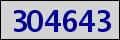

In [9]:
from PIL import Image
Image.open('kaptcha.jpg')

In [11]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

print(pytesseract.image_to_string(Image.open('kaptcha.jpg')))

304643


## 買賣日報

In [23]:
import requests
from bs4 import BeautifulSoup
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'lxml')
payload = dict([(e.get('name'), e.get('value')) for e in soup.select('input[type=hidden]')])

In [24]:
payload.update({
'RadioButton_Normal': 'RadioButton_Normal',
'TextBox_Stkno': '2454',
#'CaptchaControl1': 'GQZLE',
'btnOK': '查詢'       
})

res = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)

In [26]:
res = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx')
#print(res.text)

## Requests POST

In [28]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/Search'

payload = {
'StartStationName':  '台北站',
'EndStationName':    '新竹站',
'SearchType': 'S',
'StartStation': '977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation': 'a7a04c89-900b-4798-95a3-c01c455622f4',
'DepartueSearchDate': '2019/01/24',
'DepartueSearchTime': '18:00'
}

res = requests.post(url, data = payload)
#res.text

## BeautifulSoup
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/index.zh.html

In [30]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
#res.text

In [32]:
type(res)

requests.models.Response

In [31]:
from bs4 import BeautifulSoup

html_sample= '''
<html>
  <body>
    <h1 id="title">Hello World</h1>
    <a href="#" class="link">This is link1</a>
    <a href="# link2" class="link">This is link2</a>
  </body>
</html>'''

soup= BeautifulSoup(html_sample,'lxml')
soup.text

'\n\nHello World\nThis is link1\nThis is link2\n\n'

In [33]:
type(soup)

bs4.BeautifulSoup

In [34]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [35]:
soup.select_one('h1').text

'Hello World'

In [36]:
soup.select_one('a')

<a class="link" href="#">This is link1</a>

In [39]:
for link in soup.select('a'):
    print(link.text)
    print(link.get('href'))

This is link1
#
This is link2
# link2


In [40]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [41]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [42]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [43]:
soup.select_one('body h1')

<h1 id="title">Hello World</h1>

In [44]:
soup.select_one('body #title')

<h1 id="title">Hello World</h1>

In [45]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [46]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [47]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

## 蘋果爬蟲範例

In [48]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [50]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [64]:
for rec in soup.select('li.rtddt'):
    #print(rec)
    dt       = rec.select_one('time').text
    category = rec.select_one('h2').text
    title    = rec.select_one('h1').text
    link     = rec.select_one('a').get('href')
    print(dt, category, title, link)
    #print('=====================================')

13:33 社會 【台中3死車禍】運將抱病扛家計　洗完腎跑...(15036) https://tw.news.appledaily.com/local/realtime/20190124/1506299/
13:33 副刊 【全台首家】火車站改建星巴克今開幕　喝咖...(6550) https://tw.lifestyle.appledaily.com/lifestyle/realtime/20190124/1506212/
13:33 政治 黃國昌交棒再等等！時代力量延後黨主席選舉... https://tw.news.appledaily.com/politics/realtime/20190124/1506485/
13:31 娛樂 金馬新人瑞瑪席丹健康美　自曝曾得暴食症 https://tw.entertainment.appledaily.com/realtime/20190124/1506447/
13:31 社會 模擬歹徒持槍搶銀行　場面逼真險被報案 https://tw.news.appledaily.com/local/realtime/20190124/1506419/
13:30 社會 【台中3死】酒測值1.39！單親爸爛醉連...(303433) https://tw.news.appledaily.com/local/realtime/20190124/1506244/
13:28 政治 禁用中國資通產品　蘇貞昌：資安就是國安絕...(537) https://tw.news.appledaily.com/politics/realtime/20190124/1506461/
13:26 社會 砍到菜刀刀柄斷裂才罷手　弒父男遭起訴 https://tw.news.appledaily.com/local/realtime/20190124/1506449/
13:25 社會 【台中3死車禍】酒駕單親父獨養2稚女　與...(2245) https://tw.news.appledaily.com/local/realtime/20190124/1506397/
13:25 社會 老夫勒斃少妻　竟稱「不知她為何全身沒力」 https://tw.news.appledaily.com/local/realtime/20190124/150643

In [65]:
newsary = []
for rec in soup.select('li.rtddt'):
    newsdic  = {}
    newsdic['dt']       = rec.select_one('time').text
    newsdic['category'] = rec.select_one('h2').text
    newsdic['title']    = rec.select_one('h1').text
    newsdic['link']     = rec.select_one('a').get('href')
    newsary.append(newsdic)
    

In [66]:
import pandas
df = pandas.DataFrame(newsary)

In [67]:
df

,category,dt,link,title
0,社會,13:33,https://tw.news.appledaily.com/local/realtime/...,【台中3死車禍】運將抱病扛家計 洗完腎跑...(15036)
1,副刊,13:33,https://tw.lifestyle.appledaily.com/lifestyle/...,【全台首家】火車站改建星巴克今開幕 喝咖...(6550)
2,政治,13:33,https://tw.news.appledaily.com/politics/realti...,黃國昌交棒再等等！時代力量延後黨主席選舉...
3,娛樂,13:31,https://tw.entertainment.appledaily.com/realti...,金馬新人瑞瑪席丹健康美 自曝曾得暴食症
4,社會,13:31,https://tw.news.appledaily.com/local/realtime/...,模擬歹徒持槍搶銀行 場面逼真險被報案
5,社會,13:30,https://tw.news.appledaily.com/local/realtime/...,【台中3死】酒測值1.39！單親爸爛醉連...(303433)
6,政治,13:28,https://tw.news.appledaily.com/politics/realti...,禁用中國資通產品 蘇貞昌：資安就是國安絕...(537)
7,社會,13:26,https://tw.news.appledaily.com/local/realtime/...,砍到菜刀刀柄斷裂才罷手 弒父男遭起訴
8,社會,13:25,https://tw.news.appledaily.com/local/realtime/...,【台中3死車禍】酒駕單親父獨養2稚女 與...(2245)
9,社會,13:25,https://tw.news.appledaily.com/local/realtime/...,老夫勒斃少妻 竟稱「不知她為何全身沒力」


In [69]:
# SELECT count(title) FROM df GROUP BY category
df.groupby('category')['title'].count()

category
3C      3
副刊      1
壹週刊     1
娛樂      3
政治      4
生活      4
社會     12
財經      1
體育      1
Name: title, dtype: int64

In [70]:
df.to_excel('appledaily.xlsx')

In [73]:
#df.to

In [71]:
import pandas
df2 = pandas.read_excel('appledaily.xlsx')
df2.head()

,category,dt,link,title
0,社會,13:33,https://tw.news.appledaily.com/local/realtime/...,【台中3死車禍】運將抱病扛家計 洗完腎跑...(15036)
1,副刊,13:33,https://tw.lifestyle.appledaily.com/lifestyle/...,【全台首家】火車站改建星巴克今開幕 喝咖...(6550)
2,政治,13:33,https://tw.news.appledaily.com/politics/realti...,黃國昌交棒再等等！時代力量延後黨主席選舉...
3,娛樂,13:31,https://tw.entertainment.appledaily.com/realti...,金馬新人瑞瑪席丹健康美 自曝曾得暴食症
4,社會,13:31,https://tw.news.appledaily.com/local/realtime/...,模擬歹徒持槍搶銀行 場面逼真險被報案


## Digitimes

In [75]:
import requests
url = 'https://www.digitimes.com.tw/tech/dt/newslist_ajax.asp'
payload = {
'cat1': '0'
}
res = requests.post(url, data = payload)
#res.text

In [84]:
from bs4 import BeautifulSoup
domain = 'https://www.digitimes.com.tw'
soup = BeautifulSoup(res.text, 'lxml')
for rec in soup.select('tr.trbox'):
    tds = rec.select('td')
    category = tds[0].text
    title    = tds[1].text
    link     = domain + tds[1].select_one('a').get('href')
    dt       = tds[2].text
    print(category, title, link, dt)
    print('==========================')

產業  蘋果挖角三星SDI前高層出任全球電池開發主管 https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=90&id=0000552621_3YW5W12V36QQX2065LOQN 11:51
產業  CNBC：華為持續受抵制　陸資恐掀矽谷撤資潮 https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=70&id=0000552627_5SA5UR5S3TNH6X6OGBEX3 11:51
產業  專注Model 3銷售　Tesla大砍Model S、X產線員工 https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=90&id=0000552618_HYC58ZDE2C5LS67SJVLXB 11:50
產業  Galaxy S10售價和配色提前曝光　傳6GB/128GB版本售價破千美元 https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=70&id=0000552608_A927Y5WSLAWNVC94ZX0QN 11:50
產業  半導體景氣再發警訊　SK海力士4Q18營業利益季減32% https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=40&id=0000552604_V1F7XY7RLOP6DE59SYQ3Z 11:35
產業  德儀第4季獲利優於預期　賽靈思受惠5G商機　上季營收亮眼 https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=70&id=0000552603_OKV5APFP13TSO82KCUARZ 11:35
產業  客戶推遲訂單　ASML看淡第1季營收 https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=1&cat=40&id=0000552602_ECN5UJOP1P752C15VJBC5 11:34
產業  看好5G商機　日立化成在台蓋新廠 https:/

In [87]:
import requests
res = requests.get('https://www.digitimes.com.tw/tech/rss/xml/xmlrss_10_0.xml')
res.encoding = 'big5'
#res.text

## 抓取單篇文章

In [94]:
import requests
url = 'https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=13&id=0000552499_BRL5465W8YHU9WLV9EJ3I'
res = requests.get(url)
#res.text

In [105]:
#res.text

In [97]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
soup.select_one('.article_header').text

'戴爾服務全球馳名 戴爾推出情人節限定優惠'

In [99]:
soup.select_one('.p-t-15 span').text

'陳毅斌'

In [100]:
soup.select_one('time').text

'2019-01-24'

In [103]:
contents = [] 
for p in soup.select('.main_p'):
    contents.append(p.text)
' '.join(contents)

'\r\n「陪伴是最長情的告白」，戴爾情人陪你度過冷冽寒冬，即日起至2019年2月24日止，戴爾推出「我的戴爾情人 保護你是我的責任」線上情人節買贈活動。 針對旗下Inspiron 5000、Inspiron 7000消費筆記型電腦，XPS頂級筆記型電腦系列、Vostro商用筆記型電腦系列、Dell G遊戲筆記型電腦系列以及Alienware外星人電競系列，推出限定機型買就送限定台灣地區延長保固一年，讓你在寒冬中也能擁有來自戴爾暖暖的保護。 凡於2月28日前完成登錄，更有機會抽中Tiffany & Co. 愛心墜飾 925純銀項鍊(價值NT$26,000)。 戴爾家用電腦專屬的支援服務 全球馳名 戴爾持續致力於提供高品質的售後服務。在活動期間購買指定機種，消費者不僅可以免費享有為期一年的基本硬體服務的標準保固，還有「次營業日到府服務」，消費者可指定地點讓工程師前往維修。而戴爾在給予完美呵護的同時，更尊重個人隱私與私人空間，提供保留硬碟服務，讓你在硬碟故障時，可以自行決定銷毀資料及處置硬碟的方式，免去因協力廠商管理不當而可能導致的風險，安心保存所有資料。 此外，消費者還可選購Premium Support 或是Premium Support Plus，無論是不慎掉落，或是液體潑灑，戴爾都能提供24小時全年無休的及時支援，只要透過網路或電話，即可與專家軟硬體支援直接取得聯絡，提供如情人般全天候的保護。 而讓戴爾首開個人電腦產業提供自動化主動式與預測支援服務先河的SupportAssist技術，可確保電腦隨時保持最佳運作狀態。Premium Support 與Premium Support Plus搭配的家用電腦專屬Dell SupportAssist技術讓我們的專責專家團隊得以迅速解決問題，讓消費者儘快恢復正常作業。如無法遠端解決問題，戴爾就會派遣戴爾技師親自前往指定地點處理。\r\n\r\n\t\t\t\t'

In [104]:
' '.join([p.text for p in soup.select('.main_p')])

'\r\n「陪伴是最長情的告白」，戴爾情人陪你度過冷冽寒冬，即日起至2019年2月24日止，戴爾推出「我的戴爾情人 保護你是我的責任」線上情人節買贈活動。 針對旗下Inspiron 5000、Inspiron 7000消費筆記型電腦，XPS頂級筆記型電腦系列、Vostro商用筆記型電腦系列、Dell G遊戲筆記型電腦系列以及Alienware外星人電競系列，推出限定機型買就送限定台灣地區延長保固一年，讓你在寒冬中也能擁有來自戴爾暖暖的保護。 凡於2月28日前完成登錄，更有機會抽中Tiffany & Co. 愛心墜飾 925純銀項鍊(價值NT$26,000)。 戴爾家用電腦專屬的支援服務 全球馳名 戴爾持續致力於提供高品質的售後服務。在活動期間購買指定機種，消費者不僅可以免費享有為期一年的基本硬體服務的標準保固，還有「次營業日到府服務」，消費者可指定地點讓工程師前往維修。而戴爾在給予完美呵護的同時，更尊重個人隱私與私人空間，提供保留硬碟服務，讓你在硬碟故障時，可以自行決定銷毀資料及處置硬碟的方式，免去因協力廠商管理不當而可能導致的風險，安心保存所有資料。 此外，消費者還可選購Premium Support 或是Premium Support Plus，無論是不慎掉落，或是液體潑灑，戴爾都能提供24小時全年無休的及時支援，只要透過網路或電話，即可與專家軟硬體支援直接取得聯絡，提供如情人般全天候的保護。 而讓戴爾首開個人電腦產業提供自動化主動式與預測支援服務先河的SupportAssist技術，可確保電腦隨時保持最佳運作狀態。Premium Support 與Premium Support Plus搭配的家用電腦專屬Dell SupportAssist技術讓我們的專責專家團隊得以迅速解決問題，讓消費者儘快恢復正常作業。如無法遠端解決問題，戴爾就會派遣戴爾技師親自前往指定地點處理。\r\n\r\n\t\t\t\t'

In [131]:
import requests
from bs4 import BeautifulSoup
def getArticle(url):
    dic = {}
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    dic['title'] = soup.select_one('.article_header').text
    dic['author'] = soup.select_one('.p-t-15 span').text
    dic['time']   = soup.select_one('time').text
    dic['keyword']= soup.select_one('meta[name=keyword]').get('content')
    dic['content'] = ' '.join([p.text for p in soup.select('.main_p')])
    return dic

In [132]:
getArticle('https://www.digitimes.com.tw/tech/dt/n/shwnws.asp?cnlid=13&id=0000552499_BRL5465W8YHU9WLV9EJ3I')

{'title': '戴爾服務全球馳名 戴爾推出情人節限定優惠',
 'author': '陳毅斌',
 'time': '2019-01-24',
 'keyword': '戴爾, Dell, Dell EMC, 筆記型電腦, NB',
 'content': '\r\n「陪伴是最長情的告白」，戴爾情人陪你度過冷冽寒冬，即日起至2019年2月24日止，戴爾推出「我的戴爾情人 保護你是我的責任」線上情人節買贈活動。 針對旗下Inspiron 5000、Inspiron 7000消費筆記型電腦，XPS頂級筆記型電腦系列、Vostro商用筆記型電腦系列、Dell G遊戲筆記型電腦系列以及Alienware外星人電競系列，推出限定機型買就送限定台灣地區延長保固一年，讓你在寒冬中也能擁有來自戴爾暖暖的保護。 凡於2月28日前完成登錄，更有機會抽中Tiffany & Co. 愛心墜飾 925純銀項鍊(價值NT$26,000)。 戴爾家用電腦專屬的支援服務 全球馳名 戴爾持續致力於提供高品質的售後服務。在活動期間購買指定機種，消費者不僅可以免費享有為期一年的基本硬體服務的標準保固，還有「次營業日到府服務」，消費者可指定地點讓工程師前往維修。而戴爾在給予完美呵護的同時，更尊重個人隱私與私人空間，提供保留硬碟服務，讓你在硬碟故障時，可以自行決定銷毀資料及處置硬碟的方式，免去因協力廠商管理不當而可能導致的風險，安心保存所有資料。 此外，消費者還可選購Premium Support 或是Premium Support Plus，無論是不慎掉落，或是液體潑灑，戴爾都能提供24小時全年無休的及時支援，只要透過網路或電話，即可與專家軟硬體支援直接取得聯絡，提供如情人般全天候的保護。 而讓戴爾首開個人電腦產業提供自動化主動式與預測支援服務先河的SupportAssist技術，可確保電腦隨時保持最佳運作狀態。Premium Support 與Premium Support Plus搭配的家用電腦專屬Dell SupportAssist技術讓我們的專責專家團隊得以迅速解決問題，讓消費者儘快恢復正常作業。如無法遠端解決問題，戴爾就會派遣戴爾技師親自前往指定地點處理。\r\n\r\n\t\t\t\t'}

In [133]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.digitimes.com.tw/TECH/DT/N/SHWNWS.ASP?CNLID=1&CAT=50&ID=0000552538_A126FQPC23LPP49DXK20T'
headers = {
  'Cookie': 'DT%5Fmemip=Y; vid=f2ca9e7f0ba51d92; ASPSESSIONIDAGRBTTQT=NDECPEKAAEJHDBGMIHCAOALJ; _ga=GA1.3.1564384274.1548310386; _gid=GA1.3.314886181.1548310386; bodyFontFamilyAssign=1; checkie8=1%2F24%2F2019+2%3A14%3A34+PM; ASPSESSIONIDCWDBSSTQ=IEJPGBKAODKAEGMHEAAKLLHN; new_a1=new_a1; _td=40f126fd-b80a-4c6d-aadc-951ce05f63ce; ASPSESSIONIDAWSQSRDT=ALCEDDKANCBLIECGELKJEOAH; MemRights=KPS; sLgnTime=2019%2F1%2F24+%A4U%A4%C8+03%3A01%3A22; MemSID=171132356; yUID=andrea%40cathaysite%2Ecom%2Etw; promotype=N; DownMYID=andrea%40cathaysite%2Ecom%2Etw; UserIDPDF=XCA57016; MyName=%B1i%AA%E9%B5%D9; sShow=Y; MemberIDPDF=XCA77030; SSLUID=XCA57016; occupation=24; NewMemRights=1%2C9%2C3%2C4%2C10%2C13%2C17%2C99; DownMemID=XCA77030; DownUID=XCA57016'  
}
res = requests.get(url, headers = headers)
soup = BeautifulSoup(res.text, 'html.parser')

In [137]:
' '.join([p.text for p in soup.select('.main_p')]).split('function')[0].strip()

'日本半導體大廠瑞薩電子(Renesas Electronics)的工業設備事業，佔該廠營收約30%，也是該廠在汽車零組件外積極發展的事業，針對未來方向，瑞薩於2019年1月21日在日本東京召開記者會，公布工業設備的2種新技術，e-AI及SOTB，以2022年營收各達100億日圓(約9,000萬美元)為目標，積極努力。 在記者會中，瑞薩常務董事兼工業設備事業部長、橫田善和表示，嵌入式人工智慧(AI)技術e-AI，以及超低耗電處理晶片技術SOTB，是該廠實現智慧終端(End Point Intelligence)與智慧工廠(Smart Factory)概念的重點，也是該廠工業設備事業3個主軸：智慧工廠、智慧生活、智慧基礎建設，不可或缺的部分。 橫田善和表示，現在智慧工廠的人工智慧應用，不管雲端運算，還是邊緣運算，都需要單價逼近1,000美元的人工智慧專用晶片執行；瑞薩在2015年提出e-AI，第1階段可以用該廠推出的控制器運作，第2階段的動態重組處理器(Dynamically Reconfigurable Processor，DRP)，則是2018年10月發表的RZ/A2M。 瑞薩的e-AI從2017年6月正式對外供應，迄今已有22個國家、超過250家企業測試，瑞薩自己就用在日本茨城縣那珂工廠，讓生產作業前置時間縮短3分之2，每年節省10億日圓開支；動態重組處理器是由瑞薩前身之一、日本IT大廠NEC持續研發的技術，可進一步提高e-AI能力，且有18個月能力提升10倍的潛能。 現在e-AI測試已近實用階段，瑞薩預計在2019~2020年正式事業化，並透過引進動態重組處理器，進行軟硬雙方面的持續強化。 而SOTB則是另一方面的技術，理論上僅需10μA/MHz的電力便可啟動晶片，待機時耗電可以進一步減為100分之1的100nA，這種低耗電晶片技術，可以讓物聯網(IoT)感測器不須外接有線電源或電池，只要熱電效應發電、震動發電等再生能源技術，就可維持晶片運作。 而瑞薩也已經發表SOTB相關控制器，2018年11月推出的R7F0E，目前還位於發展第1階段的R7F0E只能執行簡單的系統控制，但瑞薩預計發展到第3階段時，R7F0E系列可具有e-AI功能，讓e-AI與SOTB合而為一，進一步擴大物聯網技術的可能性。'